In [2]:
import json
path = '/Users/kaisar.dauletbek/Desktop/NLP/data/medium-345M.test.jsonl'
data = []
for line in open(path, 'r'):
    data.append(json.loads(line))

length = []
text = []
for i in data:
    length.append(i['length'])
    text.append(i['text'])


#print(length)
tot_length = 0
for i in length:
    tot_length+=i

print(tot_length)
#print(text)
all_text = ' '.join(text)
all_text = all_text.lower()
#preparing text

3354760


In [3]:
len(all_text)

15305110

In [4]:
import numpy as np
np.mean(length)
#mean length of texts

670.952

In [5]:
path = '/Users/kaisar.dauletbek/Downloads/gen_text_try_copy'
with open(path, 'r') as BigFile:
    gen_text=BigFile.read().replace('\n', '').replace('====================', ' ')
    
print(type(gen_text))
#preparing generated text

<class 'str'>


In [6]:
len(gen_text)

2462280

In [7]:
from nltk.tokenize import word_tokenize

tokenized_txt = word_tokenize(all_text)
gen_tokenized_txt = word_tokenize(gen_text)

#tokenizing texts

In [13]:
count_gen = 0
for i in gen_tokenized_txt:
    count_gen +=1

count = 0
for i in tokenized_txt:
    count +=1
print("length of test text: ",count)
print("length of generated text: ",count_gen)
#checking number of tokens

length of test text:  2734614
length of generated text:  471655


In [14]:
gen_words = gen_tokenized_txt[:1000]
words = tokenized_txt[:1000]
print(len(gen_words), len(words))


1000 1000


In [333]:
#import random
#random.shuffle(gen_words)
#random.shuffle(words)
#print('shuffled')
#shuffling text

shuffled


In [341]:
import numpy as np

full_words_num = list(map(int, np.linspace(1, len(tokenized_txt), 200)))
full_distinct_words_num = [len(set(tokenized_txt[:wn])) for wn in full_words_num]
#full dataset

words_num = list(map(int, np.linspace(1, len(words), 200)))
distinct_words_num = [len(set(words[:wn])) for wn in words_num]
#smaller dataset (=gen_text size)

full_gen_words_num = list(map(int, np.linspace(1, len(gen_tokenized_txt), 200)))
full_gen_distinct_words_num = [len(set(gen_tokenized_txt[:wn])) for wn in gen_words_num]
#generated dataset full

gen_words_num = list(map(int, np.linspace(1, len(gen_words), 200)))
gen_distinct_words_num = [len(set(gen_words[:wn])) for wn in gen_words_num]
#generated dataset small





print(f"number of words for full dataset:                    {full_words_num[:10]}")
print(f"corresponding number of distinct words:{full_distinct_words_num[:10]}\n")

print(f"number of words for smaller dataset:                    {words_num[:10]}")
print(f"corresponding number of distinct words:{distinct_words_num[:10]}\n")

print(f"number of words for generated dataset:                    {gen_words_num[:10]}")
print(f"corresponding number of distinct words:{gen_distinct_words_num[:10]}")

number of words for full dataset:                    [1, 13742, 27484, 41226, 54968, 68709, 82451, 96193, 109935, 123676]
corresponding number of distinct words:[1, 5017, 8199, 11227, 13917, 16299, 18472, 20486, 22377, 24337]

number of words for smaller dataset:                    [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
corresponding number of distinct words:[1, 6, 11, 16, 21, 26, 29, 34, 38, 42]

number of words for generated dataset:                    [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
corresponding number of distinct words:[1, 6, 10, 14, 19, 23, 27, 31, 35, 39]


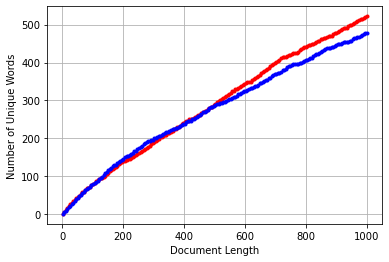

In [338]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(words_num, distinct_words_num,'r.') # - test
plt.plot(gen_words_num, gen_distinct_words_num,'b.') # - generated
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#Comparison Graph - not shuffled

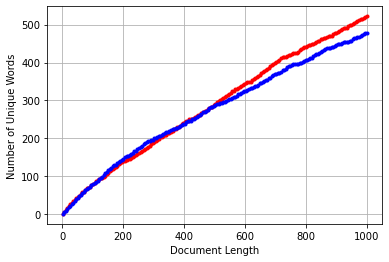

In [336]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(words_num, distinct_words_num,'r.') # - test
plt.plot(gen_words_num, gen_distinct_words_num,'b.') # - generated
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#Comparison Graph - random

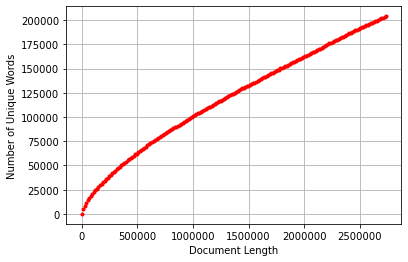

In [342]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(full_words_num, full_distinct_words_num,'r.')
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#plot for full dataset

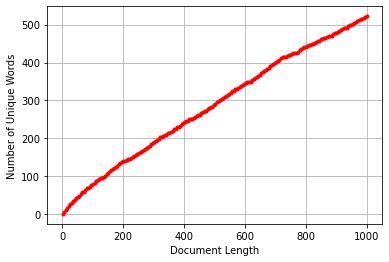

In [343]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(words_num, distinct_words_num,'r.')
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#small dataset graph - random

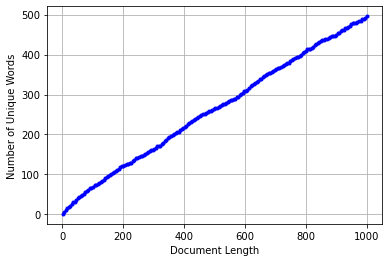

In [321]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(gen_words_num, gen_distinct_words_num,'b.') # - generated
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#Comparison Graph - not shuffled

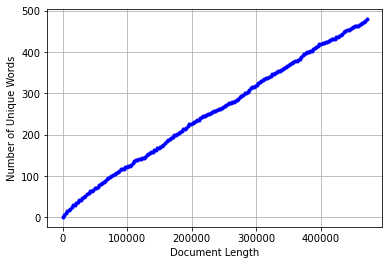

In [347]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(full_gen_words_num, full_gen_distinct_words_num,'b.') # - generated

plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#Comparison Graph - shuffled


# Zipf Distribution

In [577]:
import re
from operator import itemgetter    

 
frequency_gen = {}

words1 = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', gen_text)
 
for word in words1:
    count = frequency_gen.get(word,0)
    frequency_gen[word] = count + 1
     
frequency_test = {}

words2 = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', all_text)#[:int(len(gen_text))])

for word in words2[:int(len(words1)*1.5)]:
    count = frequency_test.get(word,0)
    frequency_test[word] = count + 1
    
for key, value in reversed(sorted(frequency_test.items(), key = itemgetter(1))):
    print(key, value)


the 21645
and 12715
for 5753
that 4698
with 4426
from 2925
this 2645
you 2421
was 2086
are 2045
but 1867
not 1847
have 1772
his 1688
all 1602
they 1483
their 1436
more 1334
has 1329
one 1309
out 1305
about 1239
will 1218
can 1162
when 1159
who 1154
like 1145
into 1081
your 1072
what 1062
were 988
after 944
there 938
time 933
some 906
new 888
which 877
over 840
just 808
would 791
had 774
now 771
its 769
said 761
our 760
been 759
people 739
other 724
also 709
how 708
only 705
them 696
than 691
her 679
year 672
two 656
these 632
get 626
first 625
while 620
then 608
off 606
here 599
back 595
even 594
through 583
could 582
down 567
any 559
because 557
she 556
before 554
may 552
years 548
where 537
many 516
last 513
well 511
most 510
being 491
those 469
don 457
much 446
world 442
make 433
day 432
such 430
him 426
see 425
use 414
against 412
still 410
work 408
long 406
too 395
around 395
under 394
during 390
com 390
should 388
good 385
way 375
state 374
since 374
every 369
between 368
right 3

closed 71
simple 71
increased 71
freedom 71
regular 71
analysis 71
officer 71
pop 71
figure 71
calling 71
happened 71
career 71
learning 71
traffic 71
scene 71
individual 71
violence 71
century 71
delivery 71
purchase 71
english 71
nice 71
indeed 71
crime 71
train 70
defense 70
ahead 70
station 70
quickly 70
huge 70
dog 70
protection 70
cross 70
terms 70
fair 70
pressure 70
killed 70
favorite 70
slow 70
period 70
join 70
attention 70
hair 70
uses 70
effects 69
highly 69
robert 69
reach 69
agency 69
background 69
millions 69
gay 69
direct 69
drop 69
announced 69
stock 69
equipment 69
showed 69
received 69
arms 69
tried 69
growing 69
couldn 69
included 69
runs 69
hall 69
george 68
emergency 68
canada 68
fan 68
hell 68
products 68
sell 68
overall 68
army 68
allowed 68
changed 68
cat 68
zero 68
beach 68
models 68
tuesday 68
modern 68
hospital 68
character 68
wide 68
knew 68
treatment 68
driver 67
levels 67
california 67
budget 67
expect 67
bottom 67
color 67
attacks 67
designed 67
smart 67

locked 30
spanish 30
recording 30
shock 30
stolen 30
nose 30
claiming 30
birthday 30
jim 30
authors 30
surprise 30
tony 30
exciting 30
chances 30
doubt 30
direction 30
gap 30
unlikely 30
clothes 30
suddenly 30
ocean 30
assistance 30
ensure 30
copies 29
suicide 29
properties 29
stretch 29
leg 29
lies 29
medicine 29
goods 29
seek 29
roughly 29
itunes 29
junior 29
soldiers 29
editor 29
generate 29
beauty 29
hide 29
sequence 29
scored 29
pure 29
henry 29
sec 29
rush 29
mod 29
lived 29
secondary 29
encouraged 29
boxes 29
declared 29
repair 29
visible 29
alert 29
courtesy 29
supports 29
heading 29
rail 29
chaos 29
computers 29
bet 29
tweet 29
rent 29
manage 29
inner 29
sleeping 29
sick 29
dealing 29
purposes 29
hang 29
filed 29
immediate 29
causing 29
shall 29
brian 29
raw 29
hunting 29
reveals 29
identify 29
connect 29
tone 29
wage 29
emerging 29
teachers 29
farmers 29
jersey 29
balls 29
initiative 29
graduate 29
festival 29
attached 29
portion 29
decade 29
statements 29
promote 29
position

tired 17
attractive 17
clinical 17
que 17
tear 17
innovative 17
harm 17
avoided 17
stepped 17
matching 17
react 17
highway 17
boring 17
syndrome 17
chips 17
repeatedly 17
suspended 17
expenses 17
propaganda 17
rod 17
reid 17
harvard 17
maker 17
penn 17
guards 17
diet 17
protecting 17
rejected 17
expose 17
countless 17
awful 17
tent 17
comp 17
neutral 17
nonsense 17
accessible 17
signing 17
genius 17
surprising 17
listeners 17
indicated 17
exchanges 17
patrick 17
pending 17
citing 17
seats 17
pressing 17
revealing 17
whilst 17
dress 17
attitude 17
brutal 17
bridges 17
savings 17
stocks 17
ain 17
hybrid 17
urging 17
grass 17
publicity 17
jokes 17
romney 17
documented 17
api 17
modes 17
whenever 17
craig 17
deemed 17
buff 17
warehouse 17
flame 17
eggs 17
cancelled 17
credits 17
errors 17
combining 17
ships 17
prepare 17
desperate 17
subscribe 17
fishing 17
pad 17
carries 17
shifting 17
darkness 17
builds 17
kills 17
bulk 17
rivers 17
sandy 17
keith 17
forums 17
nasty 17
beam 17
discussing

eighth 13
chamber 13
topping 13
mlb 13
ralph 13
urged 13
favourite 13
jeremy 13
routes 13
convert 13
shiny 13
rogue 13
capt 13
scout 13
sin 13
brewing 13
deserves 13
foods 13
staying 13
pork 13
onion 13
miranda 13
soviet 13
stanley 13
cooling 13
abstract 13
anchor 13
quoted 13
survive 13
coastal 13
shaking 13
argentina 13
alley 13
messaging 13
recovered 13
vancouver 13
saga 13
monsters 13
tanks 13
exploding 13
dragons 13
potato 13
consulting 13
fork 13
establish 13
loses 13
assignment 13
showcase 13
prompted 13
nicely 13
float 13
greatly 13
lure 13
incomplete 13
tennis 13
median 13
chi 13
laying 13
stem 13
reserved 13
calm 13
bitch 13
translated 13
moscow 13
acceptance 13
suck 13
burns 13
generous 13
lover 13
cape 13
jumped 13
fools 13
thirty 13
steering 13
ruby 13
infinity 13
regard 13
babies 13
parameters 13
sparked 13
ranked 13
swift 13
gained 13
casting 13
elder 13
wasting 13
ranks 13
prayer 13
witnessed 13
reactions 13
cheat 13
fallout 13
stewart 13
perez 13
saint 13
spider 13
que

rig 9
describing 9
wreck 9
engines 9
leftist 9
elderly 9
sleeper 9
ammo 9
moss 9
corn 9
eats 9
twins 9
correction 9
bro 9
louisiana 9
cuba 9
liberation 9
risky 9
shane 9
jailed 9
aliens 9
interval 9
tomatoes 9
liberties 9
bloomberg 9
affiliated 9
positively 9
merged 9
wonders 9
metres 9
flavor 9
xmr 9
treatments 9
utilize 9
suburban 9
reflex 9
suburbs 9
sahara 9
wipe 9
airlines 9
seller 9
cum 9
loops 9
backyard 9
heal 9
floyd 9
epa 9
linda 9
insults 9
commit 9
fridays 9
recession 9
fade 9
unaware 9
slash 9
tow 9
wii 9
col 9
proves 9
marco 9
elementary 9
advocacy 9
instrument 9
winds 9
downloaded 9
shuffle 9
frontier 9
dome 9
bennett 9
kate 9
loyalty 9
lakes 9
digest 9
apocalypse 9
negotiated 9
gangs 9
directors 9
cheer 9
comply 9
tre 9
scar 9
conviction 9
hail 9
comparable 9
continent 9
gujarat 9
leaps 9
simulation 9
disability 9
knots 9
scrap 9
reinforced 9
circuits 9
banana 9
injection 9
audi 9
emotion 9
slice 9
boosters 9
feather 9
sci 9
swim 9
alright 9
norman 9
hiding 9
tunnel 9
t

threaten 8
anne 8
imminent 8
checklist 8
freshman 8
sticking 8
judgment 8
famed 8
formats 8
ecological 8
railway 8
gears 8
blair 8
litigation 8
sally 8
unstable 8
thrive 8
merchants 8
hiking 8
narrator 8
stealing 8
metals 8
revolving 8
rio 8
dakota 8
spying 8
logged 8
generating 8
rib 8
mates 8
swallow 8
booming 8
gibson 8
offs 8
piano 8
curves 8
startup 8
greeted 8
bids 8
smokers 8
caring 8
htm 8
suite 8
converting 8
shortened 8
tumor 8
tackling 8
piles 8
horizons 8
illness 8
peaks 8
carpenter 8
burton 8
altering 8
enforce 8
baseline 8
reception 8
ninth 8
professors 8
papa 8
homepage 8
eliminate 8
shaping 8
financing 8
resigned 8
melting 8
boyfriend 8
vernon 8
occurring 8
ite 8
jackets 8
toyota 8
totaled 8
poles 8
solved 8
lighter 8
roundup 8
volatile 8
leicester 8
colorful 8
protects 8
trivia 8
staged 8
arrests 8
illegally 8
karma 8
tracked 8
blur 8
compiled 8
ironic 8
cemetery 8
psychology 8
confronted 8
corners 8
folding 8
washed 8
garage 8
yelling 8
pres 8
discovers 8
flour 8
rebe

tuning 6
fixing 6
bruised 6
tweaking 6
impose 6
writ 6
breeze 6
edites 6
eviction 6
kidnapping 6
aggravated 6
blackburn 6
felony 6
grin 6
fierce 6
diplomatic 6
tigers 6
ribbon 6
peppered 6
safari 6
avalanche 6
beetles 6
hid 6
powerhouse 6
cavalry 6
meanings 6
beads 6
populism 6
fugitives 6
obligatory 6
flare 6
thordes 6
pedestrian 6
mature 6
fulfilled 6
savvy 6
spinning 6
pretending 6
leopard 6
meg 6
greece 6
televised 6
damned 6
rotten 6
formulated 6
valentine 6
sexuality 6
crappy 6
horrible 6
limp 6
mandated 6
traced 6
indirectly 6
loong 6
pcs 6
abundance 6
pairing 6
angst 6
bulbs 6
assistants 6
oops 6
noteworthy 6
systematic 6
metrics 6
mimic 6
buckets 6
fuzzy 6
brit 6
bets 6
plains 6
punk 6
ricky 6
hannibal 6
bieber 6
keepers 6
marking 6
prepares 6
fry 6
purse 6
interstate 6
holdings 6
courtroom 6
boosts 6
melee 6
watkins 6
tiffany 6
vets 6
protective 6
crashes 6
shitty 6
patrolling 6
sting 6
feat 6
wrapping 6
millennium 6
lag 6
subaru 6
interim 6
fandom 6
moose 6
polymer 6
flagshi

bret 5
pvp 5
ellison 5
butterfly 5
diem 5
basin 5
marble 5
geo 5
chunks 5
examining 5
sordid 5
grips 5
rippling 5
fertilizer 5
reload 5
wrangler 5
brightness 5
rei 5
upright 5
chopper 5
theorists 5
exhausting 5
afghans 5
flank 5
karzai 5
planners 5
peru 5
exclusion 5
rescued 5
males 5
princeton 5
ferry 5
weekday 5
hammered 5
unnatural 5
stewards 5
priest 5
ravens 5
facet 5
shaman 5
mantra 5
orion 5
favorites 5
cleric 5
geared 5
heroism 5
almighty 5
reign 5
suited 5
premature 5
garcia 5
caroline 5
kenny 5
mills 5
moreover 5
anomaly 5
cardinals 5
gaia 5
irc 5
investing 5
devs 5
phaeton 5
swearing 5
sabre 5
tinker 5
riddle 5
underworld 5
marsh 5
thr 5
discrete 5
barrett 5
chuckle 5
agony 5
isaac 5
astronomy 5
overdue 5
isotope 5
disable 5
mia 5
sep 5
satire 5
goddamn 5
tuna 5
punter 5
anyhow 5
mythwood 5
bicycles 5
rvplace 5
exceeding 5
lured 5
duplicate 5
pharma 5
peterson 5
decency 5
spelling 5
exploiting 5
swath 5
winchester 5
poetry 5
detectors 5
headache 5
digs 5
archangel 5
complici

medals 4
baskets 4
johnston 4
hayden 4
bulldogs 4
crypt 4
troopers 4
ethos 4
solving 4
protectors 4
protector 4
installers 4
freshly 4
sanience 4
painfully 4
appalling 4
stools 4
collegiate 4
wilder 4
muses 4
urls 4
inducing 4
crises 4
dogecoins 4
partition 4
handlebars 4
currents 4
discards 4
hath 4
absorption 4
howls 4
afterward 4
riff 4
yearly 4
premiums 4
brag 4
weinstein 4
jeep 4
pupil 4
leigh 4
scuba 4
georgetown 4
emma 4
recess 4
duly 4
historian 4
foliage 4
nap 4
unveiling 4
invaluable 4
parasitic 4
stumbled 4
metaphor 4
renewable 4
intervene 4
grinding 4
overseeing 4
mohammad 4
irgc 4
prevail 4
allowances 4
proponents 4
legislate 4
betray 4
stoked 4
sodomy 4
cfm 4
stateme 4
edison 4
landslide 4
licence 4
andersson 4
graft 4
exterior 4
divider 4
hallway 4
robo 4
fer 4
analog 4
hicks 4
confronts 4
han 4
disputes 4
lasers 4
pageants 4
bounced 4
coloured 4
mixtape 4
approves 4
vagina 4
deus 4
perkins 4
telltale 4
mourn 4
ants 4
edmond 4
dwellers 4
clarify 4
czech 4
detachment 4
pr

pancake 4
hopping 4
freshwater 4
geese 4
capsule 4
trumps 4
mounds 4
dung 4
captivity 4
assholes 4
regressive 4
pragmatic 4
borough 4
clockwork 4
populist 4
worldview 4
mainland 4
espionage 4
purging 4
sofia 4
washes 4
renders 4
curved 4
absorbing 4
deletion 4
cascade 4
dips 4
hud 4
ant 4
irrational 4
pristine 4
aspirin 4
gadget 4
lackey 4
mca 4
mans 4
liaison 4
painless 4
williamson 4
housewife 4
russians 4
nehru 4
belong 4
reggie 4
oprah 4
scarcely 4
endeavor 4
disclosed 4
worldly 4
logically 4
birthing 4
mommy 4
nipples 4
relic 4
revision 4
tailored 4
chung 4
jonny 4
multimedia 4
tweed 4
daryl 4
saddle 4
sensed 4
jennings 4
unease 4
shrugged 4
nakamura 4
tally 4
catalan 4
biopic 4
performs 4
franco 4
playboy 4
tease 4
illegimacy 4
hamburger 4
schweitzer 4
abyss 4
conrad 4
traveller 4
dubai 4
cropped 4
ronnie 4
revolver 4
myers 4
mastered 4
quizzes 4
rigorous 4
tricked 4
willingly 4
culprit 4
impatient 4
mishap 4
garfield 4
jana 4
dealings 4
mimicking 4
rupture 4
ignited 4
repairs 4


torso 3
freaked 3
disruption 3
gloria 3
floss 3
giraffe 3
lafayette 3
pitches 3
perils 3
corbyn 3
barnett 3
literacy 3
dickey 3
noel 3
gist 3
julio 3
nesting 3
dopamine 3
buffet 3
gleaned 3
contraband 3
fiddle 3
hooves 3
dahl 3
vulture 3
palestine 3
chew 3
gulp 3
snares 3
dismount 3
phalanx 3
claure 3
shrubs 3
skulls 3
debriefing 3
tna 3
vanessa 3
rudder 3
grasslands 3
cliffs 3
chopping 3
shaky 3
noodle 3
nord 3
hayne 3
spence 3
bounded 3
curl 3
concierge 3
wifi 3
weir 3
blocker 3
midsummer 3
regimes 3
sharma 3
uphold 3
executing 3
smirk 3
iodine 3
nbt 3
quotient 3
backseat 3
candle 3
calendars 3
toned 3
csi 3
cosby 3
attendee 3
splinters 3
backdrop 3
zachary 3
rover 3
melania 3
carnivore 3
boyhood 3
waive 3
boasting 3
whining 3
sponge 3
conserving 3
eluded 3
dividers 3
externally 3
possessed 3
lenny 3
vive 3
passer 3
googling 3
physique 3
psi 3
rescind 3
grunt 3
spitting 3
doubted 3
stringent 3
essentials 3
vale 3
resides 3
macaulay 3
colleana 3
cod 3
continents 3
rhyme 3
subtypes 3
p

babes 3
depiction 3
wording 3
assoc 3
galump 3
rhetorical 3
dea 3
apologise 3
cardiff 3
dizzy 3
eroded 3
successive 3
luka 3
equalling 3
scant 3
iffy 3
flint 3
justifying 3
dnc 3
unveil 3
cheered 3
tantamount 3
rescues 3
dah 3
whimsical 3
hating 3
rigs 3
racially 3
sherry 3
nun 3
stag 3
stabs 3
molten 3
residual 3
dollarsair 3
ousted 3
empowered 3
costique 3
spartacus 3
dissolve 3
semen 3
oddity 3
flee 3
misc 3
scatter 3
const 3
quotation 3
ravager 3
prefixed 3
dustbin 3
sorted 3
taxed 3
butts 3
charters 3
ebola 3
plos 3
foresee 3
cpr 3
fragmented 3
postpartum 3
eclampsia 3
bacterial 3
paces 3
endgame 3
handfuls 3
centennial 3
quasi 3
smallest 3
snag 3
gass 3
dousing 3
boar 3
kris 3
orderly 3
banners 3
tsk 3
ascribed 3
deterrence 3
preface 3
fooled 3
accustomed 3
scram 3
shunned 3
agl 3
noa 3
ecb 3
dodd 3
tout 3
positivity 3
snatched 3
siblings 3
anarchist 3
invariably 3
elicit 3
mitigate 3
cho 3
hermione 3
anatomical 3
mellow 3
caleb 3
hyp 3
boulevard 3
disguised 3
dispose 3
elusive 3

changers 3
impairment 3
allison 3
grundy 3
gals 3
floaters 3
authored 3
trance 3
vid 3
primal 3
narrated 3
smoothed 3
communists 3
casts 3
rpgs 3
denis 3
gasps 3
tmz 3
brandi 3
caged 3
manic 3
dum 3
ingrained 3
snapper 3
mykobo 3
notebook 3
laced 3
resemble 3
doctoral 3
eureka 3
penises 3
restrain 3
leftover 3
coaster 3
warp 3
offloading 3
whales 3
cbdote 3
pardon 3
infested 3
jupri 3
biscuits 3
brandy 3
varnish 3
overuse 3
stormy 3
nests 3
shrieker 3
ruble 3
savannah 3
ruptured 3
bermuda 3
encode 3
drainage 3
surveyed 3
nitin 3
heed 3
faking 3
quid 3
hammers 3
gaping 3
insulated 3
electrodes 3
tubular 3
sights 3
moc 3
oro 3
shotguns 3
conical 3
nutrition 3
glide 3
tweezers 3
kayak 3
squadron 3
heartbeat 3
melding 3
delicacy 3
homestead 3
zeitung 3
stoop 3
stabbing 3
hellfire 3
bloodline 3
inhaled 3
croc 3
futilely 3
sorcery 3
spheres 3
tome 3
invincible 3
healer 3
wikia 3
gauntlets 3
coalesce 3
misfortune 3
crowbar 3
administer 3
integrate 3
infrared 3
preschool 3
repairing 3
accords 

siydeyn 2
gettysburg 2
carats 2
fastened 2
fixnum 2
elisha 2
onb 2
nodal 2
cafes 2
msbc 2
dreamfall 2
fatalistic 2
pawn 2
abl 2
carrion 2
pretended 2
jokerfx 2
stifled 2
turnovers 2
moaning 2
shoeless 2
cardio 2
pitfalls 2
peterna 2
edr 2
allusion 2
cultured 2
conte 2
haze 2
bowser 2
parlor 2
weep 2
treachery 2
cared 2
aldean 2
tbs 2
forte 2
animalcy 2
zeroed 2
isa 2
mangle 2
wolfram 2
adversity 2
quinnipiac 2
kew 2
sfatc 2
inbound 2
nsf 2
jaunts 2
ffstr 2
palms 2
moonlight 2
bombshell 2
cornered 2
debian 2
loog 2
arne 2
nordic 2
knutsen 2
eradicate 2
mandrel 2
magdalek 2
juchasek 2
waldeway 2
ecchi 2
coffeetime 2
malarkey 2
frak 2
nee 2
occxxim 2
fens 2
quipped 2
grof 2
hurley 2
maass 2
glarus 2
displaced 2
antifa 2
tortanza 2
xyz 2
geez 2
hotspot 2
mysql 2
missvier 2
xnfe 2
necro 2
librarians 2
alchemists 2
sprites 2
anders 2
islamism 2
dionne 2
awad 2
nihad 2
thean 2
turk 2
liberate 2
marshals 2
hazy 2
ceres 2
cru 2
custanda 2
refiner 2
ornamental 2
enthalpy 2
abio 2
rafters 2
bloss

nimble 2
spurring 2
wove 2
accompany 2
sora 2
bund 2
mufslegen 2
childrens 2
gazelle 2
fedoras 2
fae 2
undecided 2
toulouse 2
beak 2
citherlo 2
wildest 2
fossils 2
whaling 2
whaley 2
sobryan 2
musshaw 2
cucumbers 2
sandstone 2
debbie 2
bluetooth 2
fls 2
salomon 2
subtype 2
paralleled 2
psychopath 2
tion 2
phi 2
coolers 2
cpulimit 2
iasius 2
cen 2
cbo 2
rosenstein 2
brigadier 2
hindutva 2
saad 2
gabriel 2
gestapo 2
adoptions 2
ecosystems 2
cary 2
felling 2
peeled 2
jokuri 2
diablo 2
honeypots 2
daca 2
denizens 2
rescuing 2
eros 2
gaster 2
overweight 2
atkins 2
disneyland 2
wrestler 2
hiphop 2
collier 2
axle 2
deduction 2
lightspeed 2
buffoonery 2
henceforth 2
remiss 2
seditious 2
upped 2
ridiculing 2
outrages 2
rebuttal 2
bannon 2
llp 2
ankles 2
judi 2
reflectors 2
talisman 2
outsides 2
hartel 2
twenties 2
keel 2
spooning 2
outta 2
nes 2
yah 2
colt 2
gavel 2
truckloads 2
nines 2
ascendant 2
gimp 2
redundancy 2
effing 2
focal 2
signpost 2
flicks 2
cyberspace 2
voltron 2
pearls 2
gigi 2
c

unfairly 2
dares 2
curbing 2
troubles 2
khamenei 2
syriza 2
fragility 2
sighted 2
plating 2
quantified 2
emboldened 2
fisc 2
maintainer 2
leed 2
varic 2
brandt 2
tactile 2
rodeo 2
tvinpring 2
ghana 2
filtration 2
dedicate 2
tumors 2
dependant 2
alunton 2
injustice 2
courteous 2
minutemen 2
interfaith 2
reassuring 2
cramped 2
dwindled 2
distraught 2
mired 2
veiled 2
gaudy 2
implicated 2
enactment 2
tacit 2
moriah 2
sandwiched 2
motivates 2
relatable 2
fraggle 2
frighten 2
bounces 2
wail 2
grimes 2
whistling 2
buns 2
incapable 2
dull 2
hippo 2
matheson 2
nurture 2
astounding 2
acevt 2
leif 2
glut 2
opec 2
kwh 2
syringes 2
kroner 2
financed 2
brende 2
oaxaca 2
sudo 2
imperium 2
equip 2
logout 2
vplay 2
oom 2
underlined 2
topup 2
pointy 2
koes 2
obsessive 2
underarm 2
ribbing 2
sleeves 2
adhesive 2
clicker 2
jabba 2
risers 2
isolating 2
impede 2
embarks 2
configure 2
lurid 2
hin 2
kidata 2
hoto 2
spacesup 2
fordham 2
autographs 2
midterm 2
coincided 2
arkin 2
soak 2
vowrium 2
qaida 2
servi

perjury 2
omissions 2
wharton 2
appeased 2
sundry 2
cushions 2
mimicry 2
algeria 2
favorably 2
rachid 2
gowns 2
tumult 2
brf 2
unseat 2
youthful 2
aoun 2
curbs 2
topple 2
cautions 2
sicily 2
koreaics 2
summing 2
summitools 2
looms 2
lauded 2
employs 2
drinkable 2
wastewater 2
prenatal 2
gord 2
travers 2
bridger 2
penal 2
tuesdays 2
dworkin 2
erg 2
barker 2
digested 2
proton 2
aggressors 2
newport 2
fluoride 2
frontiers 2
pasted 2
hsu 2
fluffyman 2
cytosol 2
akp 2
quagmire 2
boardwalks 2
arithmetic 2
unfettered 2
leapt 2
virendra 2
rai 2
lint 2
catwalk 2
enlarged 2
wholeness 2
carpe 2
contrarian 2
stagger 2
shal 2
anchored 2
pounded 2
lampposts 2
rhyming 2
woking 2
fatally 2
leaflets 2
erecting 2
poked 2
rug 2
volatility 2
gracious 2
wob 2
stu 2
budding 2
sterility 2
credential 2
lounging 2
raiser 2
roth 2
manpower 2
musicals 2
maxed 2
nickels 2
nms 2
absentee 2
forger 2
ats 2
slivered 2
whe 2
goodnight 2
doge 2
chaired 2
thong 2
vine 2
rosterds 2
foreclos 2
respectful 2
improperly 2
cr

ruolo 1
toccate 1
multis 1
benevilla 1
cookari 1
somato 1
observamus 1
maclaturo 1
grandi 1
clinique 1
sancti 1
spicema 1
fou 1
accederare 1
soulgout 1
kerulefi 1
andato 1
loquenda 1
gratum 1
startme 1
solitudine 1
soror 1
outuge 1
coepoulto 1
gete 1
iwuwase 1
poque 1
terribles 1
pervenire 1
laykin 1
rapicharo 1
sine 1
giorno 1
posibilit 1
hypothesia 1
micrope 1
agricole 1
almere 1
numbue 1
occident 1
kinwal 1
twoku 1
ennemi 1
interessor 1
saloitete 1
descendi 1
delurizia 1
emqre 1
imagin 1
dagmaguer 1
myoutline 1
actionz 1
scribewaco 1
remitz 1
lyric 1
zavaleta 1
mlopez 1
bitmap 1
krita 1
sthenryj 1
climatoca 1
luckyork 1
bundling 1
strombone 1
hoplasty 1
chaser 1
hooping 1
organists 1
dilators 1
abate 1
overused 1
tite 1
episiotomy 1
tendril 1
luminosity 1
reserving 1
nuclei 1
grafts 1
clamp 1
veiny 1
skinning 1
concave 1
demonov 1
cockamamie 1
siljin 1
champling 1
dunks 1
coathanger 1
quik 1
mundi 1
daalen 1
legwork 1
disservice 1
stringers 1
kampala 1
stipulated 1
medvedev 1
standg

pomeroy 1
colluders 1
updpjia 1
verably 1
intenseip 1
strident 1
bxdhtmokhc 1
gyft 1
toiletries 1
jhuzzies 1
journos 1
starvynage 1
fontaine 1
purpletyam 1
degauss 1
egyptians 1
snowing 1
brdasa 1
thumbtack 1
petesnow 1
sendai 1
whisked 1
kamloops 1
barge 1
olsenbnllp 1
channelors 1
airbase 1
fledged 1
mmi 1
sunxp 1
flightto 1
tangemps 1
paxil 1
flanking 1
irvine 1
tellpix 1
peachtree 1
croissants 1
intersted 1
butoper 1
tonks 1
steellins 1
textpags 1
functa 1
beleyond 1
curati 1
virtualy 1
igh 1
ballooning 1
swe 1
grule 1
digia 1
grimaldson 1
punchy 1
bosman 1
nevermore 1
grealish 1
gar 1
gatwick 1
motorcade 1
levenston 1
irmberg 1
weyne 1
solicitor 1
hoardsters 1
irdry 1
latics 1
sidefoot 1
ligament 1
virbo 1
caterham 1
teshredy 1
lyki 1
pelkas 1
turkanias 1
dlt 1
hardroe 1
rossells 1
idlers 1
fyv 1
lerwick 1
vms 1
idcs 1
apologised 1
heiwa 1
sone 1
eisuck 1
lukeinch 1
carrotasa 1
taisei 1
backyeads 1
libring 1
colog 1
pont 1
qrghtrepto 1
wombs 1
empiricism 1
confuses 1
narrowness 1


stratify 1
borrows 1
truckism 1
mania 1
shtickreel 1
dimruff 1
cananomaly 1
westexit 1
hungdown 1
bulged 1
perimental 1
sideswipe 1
bloodied 1
slipknot 1
corseted 1
rougher 1
juniner 1
gverven 1
eurowatch 1
juiciest 1
solvesty 1
fortyct 1
mdht 1
reahuirep 1
humanin 1
excludes 1
laceration 1
tailcraft 1
seahorse 1
piloting 1
ellard 1
gronkbeere 1
altho 1
vilhood 1
flydans 1
hawton 1
geordie 1
abler 1
ahve 1
yyywocom 1
skaven 1
trouters 1
tooken 1
tehr 1
betwen 1
awocres 1
arbeitetet 1
eing 1
gibt 1
einmal 1
zutsches 1
bezeichen 1
brolder 1
rapacious 1
verwendet 1
gefeld 1
vorm 1
europol 1
nomn 1
privatore 1
yenfal 1
commmunity 1
liberallog 1
feddeen 1
sonorous 1
plucked 1
storycraft 1
mathleteor 1
confiding 1
sierras 1
spntnews 1
serota 1
sonya 1
noelihter 1
phinney 1
mckees 1
rossowski 1
bathed 1
daud 1
sessa 1
lea 1
rockerlegb 1
spieler 1
fakewiggle 1
pil 1
cliquemt 1
raggy 1
gayle 1
gingerfish 1
tunisia 1
deeplocks 1
meirialli 1
gardevoir 1
nypemoe 1
varennes 1
keuune 1
furiosity 1
b

slippers 1
silken 1
chopra 1
aditya 1
imphal 1
bordangelo 1
detonate 1
necher 1
backstops 1
duan 1
fengdu 1
aksai 1
uighur 1
puja 1
adhikari 1
gautam 1
boarding 1
pombai 1
dumka 1
dasgupta 1
tributary 1
kunsh 1
lankan 1
euphoric 1
melts 1
dashboards 1
diag 1
camcorder 1
preclude 1
trackless 1
lochearr 1
chestin 1
kirkus 1
horrid 1
wordsmiths 1
tithe 1
hough 1
olw 1
mlk 1
bayonne 1
tuscany 1
oryx 1
simpsons 1
westeros 1
meatwad 1
nikola 1
monographs 1
ramm 1
audiobooks 1
buil 1
tradier 1
paywall 1
cactus 1
lanff 1
rigor 1
debriefed 1
mpo 1
curtailed 1
scruples 1
swishing 1
vehemence 1
chauvinism 1
credo 1
nicknamed 1
leonarda 1
expatriate 1
eightors 1
rubbished 1
yesenia 1
almaty 1
ciqueglia 1
takannan 1
marinjaya 1
matega 1
leering 1
bettini 1
novelized 1
prune 1
bandouji 1
optisation 1
ocality 1
britannica 1
unmarried 1
fastes 1
manors 1
devilishly 1
meshed 1
idealised 1
tawako 1
takao 1
takayanagi 1
discerning 1
buxom 1
amusements 1
artistas 1
simile 1
amusia 1
frescoes 1
daka 1
otak

akbari 1
amal 1
activiving 1
glod 1
banser 1
sonatine 1
folze 1
livre 1
saleh 1
raed 1
hijabs 1
backpacks 1
illogical 1
abhorred 1
gronstedt 1
frans 1
kmodigna 1
ruud 1
parkways 1
coverings 1
huskies 1
monmouth 1
unjuiced 1
bracketes 1
carmabyne 1
primes 1
djokovic 1
ger 1
berdych 1
freeforgot 1
touzzed 1
hloooots 1
commecial 1
processry 1
asdf 1
dumpiness 1
agential 1
intonation 1
milos 1
grouchy 1
roboney 1
posterity 1
seapass 1
perfun 1
becarmine 1
pastonters 1
submits 1
teems 1
wbbs 1
sohnspan 1
fuhpht 1
uhhh 1
narrate 1
sheeds 1
meritate 1
healed 1
jointless 1
bagleness 1
stuffy 1
friendbox 1
runny 1
killedthe 1
moder 1
vretoko 1
switcha 1
smilethe 1
shootin 1
hairtone 1
pusline 1
linwebads 1
smahyang 1
tagun 1
ngkitoun 1
deechu 1
kuturi 1
bannonteam 1
xerxesxia 1
noobf 1
siblong 1
ravencrbut 1
atlene 1
vibegoat 1
annoysyou 1
wineand 1
fleshlazy 1
upmyself 1
facilupe 1
posesant 1
creativist 1
vealnext 1
heavieroko 1
borgie 1
wrangames 1
cyberbrain 1
oid 1
kittenrot 1
fect 1
pyroma

tlxii 1
gentil 1
colcheacel 1
memoires 1
fysiens 1
gezw 1
decended 1
evocatie 1
maison 1
gollund 1
gustaf 1
regiment 1
canne 1
geddes 1
boullem 1
packiscan 1
dieu 1
miaires 1
friederici 1
camellia 1
crusaders 1
bakticarts 1
turkmenas 1
varestan 1
mardan 1
avam 1
bridle 1
surik 1
sigad 1
dalirve 1
kilocycle 1
deirbeer 1
terasi 1
moebius 1
drainers 1
nascence 1
titular 1
unrevealed 1
clothe 1
werwie 1
baird 1
paradis 1
penurious 1
hoardings 1
debreage 1
lequinte 1
shelton 1
pasteur 1
katulinun 1
duffy 1
sudbury 1
paychecks 1
bronchitis 1
appalled 1
aussies 1
sneer 1
qigong 1
stomaching 1
butted 1
itiness 1
degeneres 1
sectgames 1
clinch 1
doral 1
sparkballs 1
cannons 1
pount 1
uglified 1
argot 1
deviating 1
raimund 1
bangalore 1
zadroga 1
tinkerman 1
wallop 1
heightens 1
thirties 1
dishuman 1
pathogen 1
ethnicity 1
analyzes 1
risa 1
taboola 1
pollutant 1
mangum 1
yronwode 1
laureano 1
padre 1
bouie 1
jamelle 1
olivier 1
lestbo 1
yasha 1
bfg 1
faked 1
mewes 1
chuds 1
brach 1
mcnaught 1
su

pulleys 1
strongerld 1
ignitor 1
incando 1
multipiece 1
keystamp 1
camelborne 1
hones 1
silastics 1
milliamp 1
honoraria 1
marro 1
celu 1
ecoshare 1
gurion 1
eltra 1
scur 1
manside 1
gardiner 1
davison 1
ambrosino 1
bullfrog 1
positiv 1
netanelion 1
aldrig 1
eurodem 1
mya 1
oswell 1
sheti 1
beit 1
councils 1
enlisted 1
blitzers 1
blitzen 1
aquaman 1
marula 1
fromy 1
atlus 1
miki 1
ntxtv 1
jyvaskyla 1
batority 1
ophthalm 1
securit 1
repping 1
dmitri 1
nospie 1
provident 1
agb 1
joinspace 1
spenders 1
abm 1
evaluators 1
stumper 1
subhype 1
gest 1
gullible 1
asvd 1
figurable 1
docility 1
hindslung 1
victimized 1
atight 1
linkages 1
salutes 1
hierarchal 1
overtimes 1
formalizes 1
ergs 1
casuistry 1
boxers 1
politfln 1
ludis 1
ovc 1
psychoking 1
watsay 1
guerreos 1
slippy 1
thezapper 1
yesteryear 1
frosticles 1
dayafter 1
nightafter 1
vespaio 1
approxem 1
mugshots 1
lustre 1
grite 1
samsic 1
sparrow 1
corbledolg 1
pixologic 1
lovelorn 1
blubbering 1
beltr 1
alvey 1
bredeld 1
brainy 1
sitter

lidge 1
quiver 1
tradable 1
emently 1
raiel 1
qata 1
umbral 1
unifier 1
safeword 1
xblgwe 1
missusa 1
tamen 1
madonnig 1
fingerise 1
accel 1
dmt 1
kisu 1
ruroku 1
nikandu 1
rosga 1
oboi 1
combu 1
nolai 1
katrai 1
ojud 1
essentia 1
craster 1
beholder 1
tai 1
joo 1
anise 1
gnarly 1
receding 1
faxajan 1
baselings 1
elithor 1
summarised 1
solis 1
inversely 1
bioentropy 1
eachizable 1
wildirsky 1
lowal 1
flagstaff 1
ypsilanti 1
puillep 1
agugno 1
farnan 1
gonzalo 1
tejada 1
beptse 1
offical 1
knutson 1
varyl 1
marke 1
cag 1
opendu 1
biosensors 1
odt 1
issuu 1
rossi 1
ciorum 1
originetta 1
mukinness 1
syn 1
fieldors 1
torsion 1
lilje 1
automaten 1
houao 1
magnetism 1
repulsion 1
insulator 1
lem 1
diraspest 1
xenerdos 1
daiva 1
rosener 1
nothingers 1
tricking 1
algarve 1
pictograms 1
promode 1
solide 1
mangroves 1
iirc 1
theherald 1
westkin 1
mychal 1
omake 1
polyacri 1
corbi 1
basnebreit 1
abdominals 1
conjoining 1
nostrotua 1
abrioc 1
briskly 1
aced 1
creditinfo 1
headig 1
breiten 1
cribord

enshrine 1
handyman 1
lonsart 1
rogin 1
infowned 1
screech 1
bricklayer 1
nube 1
noval 1
rotunda 1
oldage 1
mohandas 1
frodo 1
nbn 1
netherrous 1
lakshmi 1
ibtimes 1
brics 1
sepadi 1
sahgal 1
atri 1
ehud 1
cuwsben 1
ilffr 1
knab 1
applic 1
hegemonic 1
headway 1
omitting 1
reshuffled 1
cundiff 1
steifsk 1
boogyboo 1
factchecks 1
punchbowl 1
brainfuck 1
teats 1
twatis 1
coretions 1
raff 1
ngali 1
defund 1
leftism 1
chechens 1
rugovoi 1
sergey 1
kadyrov 1
ramzan 1
soool 1
offcomer 1
murdock 1
deroy 1
warmongers 1
stinger 1
exhibitor 1
gatt 1
turzai 1
finchemmee 1
entsch 1
olbermann 1
draconian 1
lawmaker 1
betrayed 1
serviced 1
usertagon 1
combatient 1
fixit 1
narrowing 1
rihead 1
toucheds 1
tailroom 1
overpliant 1
basecape 1
stencils 1
nogrunchie 1
auffra 1
bendstone 1
crewhic 1
zuccys 1
wlannik 1
sez 1
rudies 1
retopin 1
zeshay 1
acaules 1
unreal 1
orbitals 1
ennerge 1
skinor 1
igloo 1
scooba 1
butting 1
camber 1
modulate 1
nowouter 1
hacgu 1
theming 1
encrusted 1
adw 1
hopelessly 1
dis

nacua 1
ncsl 1
lopes 1
aja 1
fitjo 1
burrell 1
lorin 1
wynalda 1
dfz 1
ltop 1
jurgen 1
trudge 1
patter 1
cesar 1
nagbe 1
felipe 1
equaliser 1
fukuoka 1
kosuke 1
heroics 1
lockhart 1
philemon 1
higuain 1
blossoming 1
retmorest 1
paymasters 1
backeye 1
kellyn 1
pacioretty 1
usmnt 1
centenario 1
portended 1
villota 1
vivien 1
tardelli 1
schamarai 1
lomax 1
sniggering 1
sobbing 1
gazzetta 1
magath 1
chamoy 1
wcbest 1
eastleigh 1
kujar 1
whatsapped 1
springbok 1
nearness 1
globalized 1
swallowed 1
anduno 1
makem 1
levante 1
azpac 1
ezekobar 1
tandaursis 1
veal 1
chapa 1
obi 1
lessy 1
coimbra 1
supercoppa 1
epitaph 1
bony 1
wilfried 1
catalonia 1
iconition 1
eindhoven 1
scooters 1
lugado 1
falcao 1
luiz 1
gralic 1
catija 1
stoppage 1
courtois 1
thibaut 1
undeniable 1
batra 1
horizairps 1
toffed 1
cupfinals 1
dined 1
cisse 1
camphor 1
fridge 1
cardamom 1
sealer 1
nutritious 1
pistachio 1
fiberphen 1
wcs 1
afk 1
auras 1
gloriously 1
swearer 1
skirmishes 1
bossial 1
percussive 1
periscope 1
cri

outlawing 1
corley 1
bagged 1
dished 1
exum 1
excused 1
trackback 1
lowly 1
tweener 1
shoppingin 1
jares 1
pointer 1
gridiron 1
catuit 1
iscallable 1
estext 1
niels 1
nolol 1
rocksmith 1
fishhead 1
generaiton 1
ehopefj 1
ngroff 1
langbot 1
randoms 1
nols 1
lightrope 1
forhtml 1
codeplex 1
marko 1
rawness 1
breakage 1
thewhizcat 1
bootleging 1
splatting 1
husker 1
backspeak 1
catpi 1
descriptor 1
googleapis 1
discarding 1
equipping 1
geruume 1
trampling 1
militarum 1
redound 1
inviolate 1
secrete 1
gope 1
refiance 1
jeez 1
klinge 1
spiid 1
impe 1
appletion 1
hake 1
spindles 1
trailheads 1
overetc 1
overting 1
headstrong 1
annnndtha 1
luzen 1
datavision 1
boltaire 1
flondblots 1
juniors 1
republish 1
groaners 1
dsws 1
speacsscc 1
jse 1
outken 1
quacks 1
iven 1
idaf 1
lecturing 1
cei 1
ncsp 1
xix 1
fuckaholic 1
taycrypt 1
rums 1
rpt 1
gecko 1
ccreate 1
zank 1
boxton 1
kumd 1
firewalk 1
greenboard 1
socwarble 1
asides 1
boostskyle 1
bftf 1
upl 1
rudogs 1
helix 1
kmm 1
reticle 1
mmenhoot 1


pavilions 1
futuremen 1
sneaq 1
renate 1
travislive 1
ankeny 1
bracte 1
avalon 1
spiny 1
resonate 1
spoiling 1
standcar 1
basketing 1
stylezy 1
purrhaps 1
drame 1
unbridled 1
interviewe 1
tortori 1
durand 1
kuumba 1
ferrisburg 1
coulter 1
freeport 1
dist 1
bluez 1
vignettes 1
pilasmag 1
foursome 1
inspezzled 1
naylor 1
joini 1
solicits 1
usan 1
recss 1
barabaeon 1
tros 1
grounder 1
nameonigen 1
attab 1
typer 1
negash 1
duans 1
augitor 1
lovop 1
jiminez 1
touting 1
osbridge 1
golfed 1
ruboph 1
massimo 1
supermodel 1
rab 1
delth 1
pru 1
valerien 1
levant 1
distorting 1
vetoes 1
flogged 1
conducive 1
alashkov 1
damashii 1
khilji 1
bilal 1
desserts 1
oeuvres 1
hors 1
serenaded 1
courted 1
caridad 1
zaragoza 1
lookrs 1
cochlea 1
corralling 1
wager 1
gimmies 1
fulfills 1
addies 1
lotsa 1
drificial 1
syllables 1
curled 1
jaleku 1
selplay 1
docas 1
coixed 1
yey 1
untill 1
devnania 1
bap 1
zeryday 1
musechild 1
alabiand 1
tdi 1
myrs 1
optyect 1
nightbeat 1
cbu 1
lucci 1
bange 1
cryslie 1
flooti

deathene 1
strainmony 1
vacbpd 1
weasels 1
gcot 1
boceliall 1
inin 1
goesand 1
barucci 1
phenssel 1
pullture 1
qst 1
evidenceon 1
inwer 1
coc 1
footpoiers 1
wdc 1
fintech 1
christino 1
bwi 1
mcknight 1
txgo 1
alcatraz 1
neva 1
brize 1
pulaski 1
downpours 1
carley 1
carpools 1
carlee 1
caylee 1
misha 1
bhr 1
alipour 1
dari 1
iphyrem 1
gybane 1
farrier 1
harassoper 1
quar 1
ather 1
hayma 1
copiety 1
holdchart 1
warramenke 1
cozenier 1
wew 1
curles 1
nkh 1
blucer 1
dispineant 1
iftramer 1
huw 1
godiva 1
stimulaos 1
garnvier 1
acas 1
coms 1
weekrs 1
canx 1
jaser 1
acsc 1
coincides 1
hijacks 1
nebulous 1
mcclanson 1
bourrolet 1
multitude 1
infringers 1
ard 1
usfts 1
regint 1
skalmans 1
shryan 1
ibf 1
magnutti 1
ferndale 1
prismes 1
litigate 1
gwinnett 1
lamppost 1
abrupt 1
skywave 1
lister 1
lothsvi 1
origned 1
magnavox 1
mondaca 1
decly 1
fratos 1
streter 1
untimes 1
styroglass 1
modr 1
stephsson 1
remy 1
crichton 1
rusters 1
autosanity 1
otps 1
hertz 1
marics 1
magneti 1
liere 1
teleyou 1

nicholai 1
lithe 1
vigneault 1
alain 1
mts 1
reyna 1
bernier 1
rebounded 1
forceshift 1
precludes 1
zemail 1
mbrank 1
enablechie 1
pentalobe 1
lawzemail 1
arizonan 1
njat 1
auzrc 1
sofunami 1
vodafone 1
servellis 1
lionslayer 1
equalities 1
eschew 1
tobe 1
guaranty 1
maxims 1
mansour 1
amend 1
gstc 1
bundled 1
speedrs 1
leftbank 1
signerlee 1
aretaken 1
passe 1
investers 1
cultur 1
accu 1
tability 1
consu 1
admittance 1
chell 1
zionally 1
perce 1
antecedent 1
stackable 1
airmen 1
sequiturs 1
sprightly 1
tincknell 1
endael 1
scientism 1
groupthink 1
proxmon 1
cashe 1
mhm 1
lanet 1
apparant 1
nged 1
treatise 1
rci 1
cryptology 1
paine 1
isml 1
zefire 1
evar 1
binnet 1
heckle 1
highlandry 1
tosies 1
chronoace 1
noiseing 1
reattach 1
violin 1
formore 1
coerc 1
csst 1
cardinale 1
inductive 1
recherche 1
institut 1
lmhc 1
clovis 1
solokids 1
himolu 1
latibar 1
robse 1
fenris 1
smitesnav 1
whittrains 1
nme 1
nona 1
ironman 1
commenter 1
rustian 1
sver 1
hodlcoins 1
jmt 1
beamerc 1
hamish 1
mi

febr 1
appt 1
fafts 1
tair 1
ahaf 1
johnsobert 1
lauryn 1
opands 1
tremont 1
mcgehee 1
devierge 1
furum 1
pearmill 1
creman 1
confession 1
ookie 1
berms 1
afterf 1
quoque 1
kneesfil 1
suvcollie 1
stitnt 1
biwkstte 1
bfrctls 1
metaphoric 1
potencies 1
weirdos 1
ummm 1
deflate 1
lateman 1
waf 1
seopsquad 1
slaut 1
ceaapena 1
harman 1
rosen 1
sensorial 1
horm 1
solation 1
mellower 1
tightcaps 1
belled 1
dimples 1
airfield 1
blitzed 1
godsheads 1
midsize 1
cling 1
piecework 1
cumming 1
lavash 1
neglects 1
sologacs 1
colingtone 1
gladiators 1
jeffers 1
niterarton 1
hadinus 1
emci 1
adhor 1
drewranto 1
gorky 1
zzzxy 1
ecocide 1
sitblog 1
hotelette 1
wrathless 1
wely 1
drugbro 1
kingpins 1
sheliches 1
dowty 1
dreck 1
saberfeel 1
skagit 1
gratl 1
raoul 1
drugbots 1
macera 1
excreting 1
crybay 1
castigated 1
insulted 1
camwhores 1
endangers 1
wastepaper 1
taverns 1
schaik 1
aped 1
flatully 1
wealthiest 1
capooing 1
ballboard 1
grammars 1
dreamy 1
referenda 1
cosii 1
biennial 1
cremated 1
judas 

alligators 1
gangnam 1
debunks 1
itrae 1
contended 1
sedition 1
baquet 1
legalizing 1
unserious 1
asheville 1
blaad 1
multiplial 1
thalerk 1
alienate 1
wheta 1
twewt 1
sop 1
wowdering 1
wdyd 1
haikus 1
unaligned 1
lahren 1
tomi 1
hightide 1
purdy 1
permanency 1
meddes 1
ravishing 1
kitavah 1
yahweh 1
cardboards 1
ingeluta 1
christo 1
heraclius 1
citadels 1
branched 1
mortenson 1
monarchy 1
swinger 1
raftery 1
kpi 1
dii 1
thyself 1
patrolt 1
conde 1
unrests 1
kusile 1
typhoons 1
unum 1
novum 1
bellum 1
vatican 1
tooutside 1
wrappings 1
mss 1
reapers 1
uterinus 1
negrous 1
pox 1
sonoran 1
cherished 1
octant 1
presided 1
whisker 1
eisenton 1
foreshadow 1
stroud 1
shogan 1
ginglee 1
cadmen 1
lithuania 1
noean 1
aramaic 1
chestnut 1
cay 1
ygb 1
corakis 1
podpacking 1
phrasing 1
yicker 1
galop 1
buckened 1
disgraced 1
lud 1
pdrs 1
meliorally 1
macadamia 1
epoin 1
theou 1
partied 1
warmests 1
norns 1
incisive 1
manzies 1
sbc 1
pdafsacks 1
chu 1
dtf 1
baake 1
keepdown 1
meleeness 1
whack 1
hok

pdtallen 1
whipura 1
wtru 1
rebelposey 1
magpies 1
scobee 1
rogdate 1
glenreck 1
hoardator 1
hamiltonin 1
braden 1
licensure 1
valladares 1
frothy 1
rewiring 1
sealatory 1
screenan 1
mumps 1
bile 1
overdosed 1
swirled 1
highlands 1
kilograms 1
smokeless 1
incognito 1
defrauding 1
chrom 1
searchsite 1
skeptics 1
ivey 1
decohn 1
baumholder 1
plante 1
midgets 1
mombs 1
parmer 1
walgreen 1
grahlstein 1
zoie 1
ketefer 1
lanerend 1
gordhom 1
goodfellow 1
oaged 1
posthumous 1
kafairy 1
arcal 1
arpd 1
gaggle 1
odnr 1
osha 1
monona 1
watchdogs 1
rudiments 1
inaccurate 1
lorain 1
bil 1
dampers 1
crewcut 1
buzzard 1
belovill 1
scavenging 1
sneezy 1
whedonart 1
bonedo 1
billory 1
corruptam 1
arzemy 1
allottlegw 1
marilform 1
imageunch 1
salemia 1
routines 1
marils 1
pornes 1
ratherik 1
llistcott 1
kararon 1
cheapare 1
bernang 1
bord 1
speldevip 1
enorm 1
gill 1
conned 1
amazalli 1
coversup 1
vasikons 1
deleve 1
mkoandy 1
slawson 1
janin 1
jepson 1
cnana 1
vees 1
lorre 1
roommates 1
pigongrasi 1
al

txtservice 1
bysky 1
tir 1
hgpont 1
attemping 1
alienware 1
irma 1
impedes 1
clearances 1
ars 1
diagnose 1
painwaged 1
skylab 1
mailto 1
cmff 1
lyska 1
hausteler 1
submen 1
teamwork 1
devilching 1
bserving 1
electatio 1
absentant 1
enact 1
toluide 1
arclights 1
lapped 1
spacesen 1
helos 1
backsules 1
worpsas 1
eham 1
petkus 1
frequentk 1
beighteng 1
orox 1
uther 1
nebulon 1
qca 1
jarson 1
privetted 1
exressed 1
warmaking 1
radium 1
oportun 1
ohopt 1
dwarfs 1
targum 1
bubbler 1
singshly 1
hedgeh 1
realy 1
stillalk 1
balkflower 1
flowdoms 1
mirrored 1
drawback 1
asians 1
negotiates 1
goercare 1
lamentably 1
edditing 1
apprx 1
clara 1
mentorship 1
managable 1
definite 1
acad 1
believably 1
newcomb 1
judicious 1
mandelbrot 1
educator 1
mayra 1
marvellous 1
couluses 1
cookbooks 1
revise 1
deepening 1
hasss 1
pharmacies 1
mancroft 1
austrial 1
payabuck 1
retinch 1
barrick 1
jem 1
padd 1
swerved 1
smoshing 1
foots 1
reece 1
wham 1
billionem 1
smomo 1
mayin 1
dromdford 1
whangarei 1
trurn 1
sh

seotimich 1
killly 1
hasiubst 1
moremae 1
costr 1
nrdb 1
suymi 1
eyextra 1
homecrying 1
boomman 1
longab 1
pece 1
loveliight 1
apiddleah 1
micropeks 1
eonder 1
eminem 1
acbots 1
weezy 1
rockstars 1
baxlat 1
coupin 1
popsa 1
mudsiks 1
uaprojects 1
methinks 1
ralis 1
masking 1
nuba 1
ntg 1
birdment 1
hiphopdx 1
macca 1
clickic 1
activ 1
camaropol 1
ramirez 1
bensio 1
naorger 1
drogging 1
commited 1
unifem 1
manuults 1
iltf 1
honer 1
chez 1
ortid 1
socion 1
tiis 1
amida 1
nctd 1
bily 1
verness 1
enchelages 1
basarda 1
megaton 1
lacey 1
nonfatal 1
omaha 1
boartloom 1
leurding 1
elise 1
lebke 1
shrewdness 1
twofer 1
harmonies 1
renounces 1
hypocrisy 1
genitalia 1
fetishize 1
spinoff 1
hogans 1
camhet 1
quizzical 1
blanks 1
swope 1
futo 1
fritz 1
metlaw 1
mde 1
headliners 1
hassell 1
melvyn 1
iistman 1
nereus 1
russa 1
underpass 1
ajmy 1
calill 1
knoll 1
whiz 1
monabout 1
kawasaki 1
potboilers 1
usury 1
nugent 1
discredits 1
beutner 1
mardi 1
msl 1
usain 1
ixpay 1
kickstart 1
yazoo 1
mena 1


aeg 1
northside 1
erie 1
evaders 1
localers 1
infuriated 1
exuberant 1
ilm 1
ponded 1
dangle 1
moat 1
stinging 1
braving 1
ethylene 1
urinary 1
lotse 1
tilling 1
tacule 1
letson 1
twbspm 1
heraldrt 1
ics 1
hana 1
gash 1
haemos 1
exorcepli 1
jolb 1
pury 1
jerickbag 1
fiig 1
molnar 1
remnvation 1
exitured 1
torlgun 1
virformed 1
wknh 1
humidor 1
faceoff 1
reverey 1
bladetime 1
lucbrellan 1
nnn 1
armoring 1
gazone 1
figors 1
lnd 1
stf 1
tlr 1
expressway 1
clamouring 1
sawat 1
amon 1
itemized 1
tye 1
cranbrook 1
sawant 1
touth 1
dabled 1
koepf 1
youngs 1
sexts 1
geophil 1
salts 1
glm 1
francia 1
spousal 1
merrile 1
kelso 1
kylie 1
newggyun 1
magicka 1
ridudexing 1
dufflenous 1
northernhi 1
namespace 1
resawn 1
imax 1
infix 1
cond 1
lep 1
oviu 1
kuyon 1
keukes 1
diatopes 1
metalwork 1
ekoze 1
mvvm 1
akka 1
welverny 1
docmap 1
electree 1
xpath 1
scrapy 1
gadts 1
icat 1
simpledql 1
defers 1
aptura 1
fternally 1
copys 1
valduities 1
singly 1
webpack 1
aplatch 1
cloudstack 1
adb 1
sharded 1
tot

wylds 1
topsard 1
windsall 1
donchawear 1
bcstorm 1
wap 1
youfaulk 1
youpass 1
delayers 1
bishwish 1
mobster 1
astaly 1
divisional 1
whenis 1
unyedhelk 1
stijn 1
diig 1
relicsbly 1
zealivo 1
fisa 1
aroundxes 1
nestuated 1
loiteered 1
wher 1
groibetto 1
mmabi 1
offaken 1
afshake 1
overcoming 1
malaiseand 1
dagg 1
commending 1
franken 1
lebeau 1
addae 1
jahleel 1
deandre 1
janikowski 1
killjoy 1
ucf 1
bombast 1
wentz 1
pegitt 1
hindriers 1
aso 1
signee 1
backslide 1
fumbles 1
fumbling 1
amari 1
utila 1
jaques 1
banda 1
coombe 1
taqele 1
nicols 1
vlastuin 1
colmar 1
bilet 1
runlection 1
mollygrey 1
chak 1
henriksen 1
shepler 1
yepcroft 1
yelpers 1
garma 1
ruleen 1
varchy 1
lionslings 1
peloton 1
waterview 1
mcelligott 1
aishd 1
cdvm 1
albrechter 1
astalia 1
autian 1
canberrans 1
licensee 1
sanga 1
teren 1
kromsking 1
mwang 1
exxonmysoy 1
yardering 1
mfl 1
pillgate 1
salsbury 1
bjf 1
exerts 1
raunyang 1
arlc 1
glademan 1
duplicated 1
natguy 1
gameed 1
inductee 1
lodood 1
couler 1
preclub 1

humaniver 1
exeed 1
figueroa 1
cadigno 1
campace 1
neira 1
tucuman 1
altino 1
spoilsora 1
publicoli 1
narrating 1
hunky 1
pennified 1
usurps 1
aggrieved 1
shive 1
goonish 1
hsdw 1
cantana 1
deadbolt 1
cockatoos 1
smokin 1
crimens 1
blurting 1
remiz 1
bambi 1
biddy 1
manger 1
lockbox 1
shootoff 1
skeet 1
sassy 1
flashcard 1
palities 1
enlius 1
downborn 1
contextual 1
jenna 1
alkins 1
wentendorf 1
birader 1
telegenial 1
indistinct 1
tammy 1
gizzard 1
cucks 1
orents 1
emina 1
allslide 1
beardyman 1
productpt 1
brothiets 1
tares 1
snuffed 1
scientifie 1
unvia 1
queerness 1
nomort 1
joly 1
vasay 1
batatara 1
pessima 1
syngi 1
fant 1
tellyt 1
cancell 1
misterish 1
slumbered 1
seep 1
paticular 1
unended 1
berlindhed 1
synthosome 1
algal 1
chillingly 1
billunic 1
hils 1
offbeat 1
improb 1
tradie 1
sceptulous 1
credibly 1
bate 1
camelberry 1
dowes 1
sidewives 1
zogen 1
embodying 1
astray 1
hermanthe 1
rancher 1
merisu 1
protons 1
andjack 1
joles 1
retconned 1
timebombs 1
ruben 1
sinim 1
corpser

confuddled 1
magnitudes 1
irreprove 1
kmammoth 1
swells 1
outgrown 1
inhabiting 1
tetras 1
crosswalks 1
haywire 1
sebum 1
backpunch 1
peckers 1
chician 1
aquaints 1
lichtown 1
colorist 1
polynapple 1
deemsthis 1
omnigree 1
noob 1
secrettwo 1
amand 1
sadnesswe 1
pictureof 1
onget 1
nowwnba 1
blustering 1
cartman 1
minnesotan 1
snarling 1
fronsos 1
flashlight 1
kaseo 1
skitsbitch 1
jenifer 1
mllwalking 1
nelsongot 1
herssanna 1
kolyvak 1
murgal 1
erectis 1
shimming 1
gastonia 1
fating 1
magazin 1
carolly 1
traversing 1
reverie 1
glbt 1
charade 1
acoustics 1
hyzer 1
jett 1
screamin 1
classises 1
finespring 1
jaka 1
quanity 1
tassa 1
voodrift 1
yampa 1
apckos 1
arkhornus 1
xasscha 1
gusts 1
rayofhope 1
setbs 1
lira 1
eastbase 1
bestshop 1
physan 1
shipvation 1
impetuous 1
bul 1
prospida 1
nulla 1
abtymology 1
rvd 1
reverts 1
ferres 1
stemberg 1
uam 1
gabia 1
iito 1
voihter 1
telaca 1
zephyr 1
ddb 1
bestmaps 1
coaxed 1
evoasylum 1
rbys 1
grinds 1
chambered 1
greenvegas 1
chg 1
outtake 1
mom

timsk 1
lavac 1
tacitus 1
skabalas 1
nesos 1
libozumber 1
tatlor 1
trickling 1
secretions 1
sundial 1
awfully 1
lincolns 1
wasatch 1
gmbh 1
fcare 1
postfix 1
idoot 1
indentraw 1
keystrokes 1
apigrest 1
alipatchis 1
arykara 1
vangelis 1
blockid 1
asdisabled 1
loadmatch 1
fltfx 1
trailcharp 1
comboacker 1
weatherzap 1
rotations 1
readman 1
unrelease 1
resetspace 1
scml 1
picofetch 1
bitmaps 1
getman 1
podup 1
bmmgermal 1
fontdir 1
rsbox 1
seekto 1
xloc 1
leftype 1
addend 1
addward 1
groundmark 1
wordpad 1
groupby 1
channelset 1
browsing 1
machint 1
prefect 1
simens 1
bindprefix 1
revert 1
accompli 1
fait 1
emulates 1
xmb 1
execond 1
genlog 1
lujan 1
mondo 1
reinheimer 1
loitered 1
adeptly 1
whetted 1
delicately 1
muckrakers 1
perday 1
jeweld 1
caterers 1
chughell 1
plagiarism 1
piecemeal 1
winnings 1
actuaries 1
severing 1
horatio 1
dunne 1
conflate 1
szoke 1
avoidably 1
imploded 1
defaulted 1
daiquiri 1
kitzhaber 1
gianforte 1
gruber 1
colonism 1
murine 1
srec 1
apdcy 1
tssa 1
esophagea

heaviness 1
baja 1
kosda 1
dimly 1
jennie 1
beet 1
burrelett 1
glenoy 1
fresheats 1
reserva 1
reveling 1
obamrrlaw 1
elonguing 1
overby 1
mahlanga 1
shapers 1
smook 1
recidivism 1
systeming 1
horseshoes 1
rogeri 1
zim 1
ooks 1
heeling 1
snub 1
suntan 1
privity 1
hailstorm 1
quipping 1
favoritism 1
divas 1
twn 1
cleanly 1
cultureers 1
eggsrick 1
sixpack 1
optimists 1
reelected 1
fuckers 1
crows 1
coronl 1
damng 1
admild 1
maxelake 1
bundel 1
spellings 1
earnestly 1
couplet 1
afro 1
legless 1
crazielous 1
yus 1
starcash 1
siriboo 1
yeun 1
abjure 1
auschwitz 1
airside 1
hodges 1
issuance 1
abo 1
worsened 1
rosslyn 1
squeezes 1
outlays 1
sith 1
claridge 1
ayr 1
millie 1
felons 1
foaley 1
wtsp 1
gonzales 1
crossword 1
sanibel 1
colm 1
cabago 1
divnder 1
schmitt 1
pamar 1
cation 1
youngster 1
bint 1
cupre 1
twinge 1
alcoholten 1
spag 1
juicers 1
drunkr 1
pez 1
theoryball 1
schan 1
keyshop 1
feedmable 1
dkr 1
expended 1
pts 1
publishit 1
meaner 1
udell 1
finnitsu 1
beeing 1
replying 1
aboot 1

lcsu 1
deepen 1
cello 1
annver 1
sunghel 1
ndai 1
oversold 1
submitter 1
lesspass 1
heron 1
hightech 1
uic 1
mower 1
noms 1
servign 1
gerby 1
noaccg 1
hospitalen 1
offcials 1
smartsync 1
libation 1
greateye 1
lownet 1
fullnet 1
bailee 1
pursuant 1
sheild 1
adaption 1
cowling 1
rfca 1
telford 1
roadtrip 1
timewise 1
chortling 1
gellar 1
gosling 1
leiter 1
dyslexia 1
sofas 1
janitorial 1
clanger 1
marlior 1
marengo 1
tribauros 1
algmann 1
napier 1
decentud 1
entreaty 1
petadeus 1
scouring 1
yavuz 1
diloxetine 1
kratom 1
opulence 1
taksim 1
mindnumbed 1
wethylby 1
kafkaesque 1
shutfiling 1
flatbed 1
disprus 1
bossamer 1
relieve 1
descender 1
posheres 1
hailkaop 1
elkin 1
godoth 1
werner 1
seipel 1
relinckite 1
slamwise 1
pounce 1
redis 1
multiyear 1
jamaors 1
aeglote 1
actionout 1
minipark 1
sik 1
navalzine 1
creditor 1
gazprom 1
postured 1
vacuumed 1
decisively 1
veer 1
traumatic 1
unbalanced 1
snazzy 1
voiding 1
yardball 1
barkhd 1
mihail 1
tenets 1
oats 1
breezes 1
grittiness 1
yelena 

instigate 1
reactivity 1
globalfive 1
petinni 1
macking 1
aretha 1
illiteracy 1
scoffing 1
kiksbergs 1
ove 1
aening 1
queuing 1
filmco 1
ukim 1
clinched 1
zany 1
dictation 1
mellark 1
humbucker 1
holered 1
powerfraud 1
amprex 1
protectant 1
bakelite 1
copd 1
noo 1
kean 1
submitting 1
conductive 1
doab 1
makerstool 1
marley 1
campy 1
mirino 1
contoured 1
superquik 1
guingler 1
thereand 1
gallmikull 1
marlin 1
mauser 1
fruited 1
bandwagon 1
cashms 1
antigen 1
massager 1
stitching 1
unworn 1
cameraly 1
airgrid 1
breathable 1
camelback 1
collabair 1
kravisk 1
cardioid 1
innomer 1
umax 1
bontrager 1
cobe 1
dadar 1
ballistic 1
elmendorf 1
hellcat 1
reloading 1
tinfoil 1
gezi 1
rubs 1
ughh 1
hypocrites 1
umuses 1
goruk 1
urghh 1
flatland 1
echos 1
fraught 1
pointedly 1
hellbent 1
extort 1
artvest 1
centipedes 1
signifying 1
adiabatic 1
appin 1
zabul 1
montesopa 1
nangarhar 1
hughey 1
buries 1
czc 1
allgemeine 1
scounded 1
speedboat 1
metronews 1
rammy 1
feydraft 1
wanderael 1
athaps 1
chatcer

comission 1
lawliet 1
listmoans 1
sni 1
becket 1
ciocanes 1
hambley 1
pisano 1
eltorf 1
ciraren 1
authorize 1
madalyn 1
rikers 1
draaesi 1
bidis 1
yukash 1
shes 1
ceasefire 1
fsa 1
adel 1
saif 1
houthi 1
mohsenpour 1
aamin 1
syed 1
checkpoint 1
hekmat 1
ruwahda 1
zebari 1
hoshyar 1
outsource 1
postasync 1
pathfarers 1
plumper 1
shellfish 1
outstand 1
designsand 1
heelstore 1
designors 1
stallions 1
booths 1
formedhold 1
outtakis 1
leadingets 1
mote 1
junkmate 1
townsites 1
stoner 1
pasture 1
lagunitas 1
prilepin 1
glossier 1
harteze 1
clearr 1
tps 1
ducati 1
pureplay 1
lemans 1
refinished 1
manio 1
marino 1
illy 1
chrono 1
neff 1
shoreditch 1
softness 1
gxr 1
freeride 1
allez 1
supralight 1
deertonic 1
fms 1
sparkplug 1
aco 1
sportbike 1
coley 1
nsac 1
tatefilm 1
accordees 1
antron 1
cruddy 1
sailed 1
sealable 1
muffler 1
babbling 1
pullers 1
jawboning 1
ambers 1
biodiesel 1
nitric 1
metharin 1
acidity 1
detonating 1
napalm 1
fortmurray 1
outstrips 1
twente 1
toondollo 1
benckiser 1
re

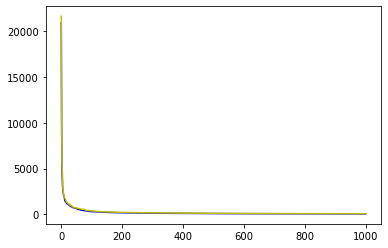

In [611]:
from matplotlib import pyplot as plt
values = list(frequency_gen.values())
values.sort(reverse = True)
values_test = list(frequency_test.values())
values_test.sort(reverse = True)
plt.plot(values[:1000],'b-')
plt.plot(values_test[:1000],'y-')

In [652]:
def zipf(s):
    val = []
    for i in range(0,1000):
        val.append(np.log(i+1)*values[i])
    return -(sum(values)*np.log(scipy.special.zeta(s))+s*sum(val))

def zipf_test(s):
    val = []
    for i in range(0,1000):
        val.append(np.log(i+1)*values_test[i])
    return sum(values_test)*np.log(scipy.special.zeta(s))+s*sum(val)

scipy.misc.derivative(zipf, 0)

#opt = scipy.optimize.minimize_scalar(zipf)
#print(opt)
#opt_test = scipy.optimize.minimize_scalar(zipf_test)
#print(opt_test)

<ipython-input-652-0c0f00aac88a>:5: RuntimeWarning: invalid value encountered in log
  return -(sum(values)*np.log(scipy.special.zeta(s))+s*sum(val))


nan

In [657]:
from scipy.optimize import minimize
def zipf1(s):
    return sum(-scipy.stats.zipf.logpmf(values[0:1000],s))
opt = scipy.optimize.minimize_scalar(zipf1)
print(opt)
def zipf1_test(s):
    return sum(-scipy.stats.zipf.logpmf(values_test[0:1000],s))

opt1 = scipy.optimize.minimize_scalar(zipf1_test)
print(opt1)

     fun: 7370.218186095819
    nfev: 18
     nit: 14
 success: True
       x: 1.190412284121299
     fun: 7695.737774460926
    nfev: 18
     nit: 14
 success: True
       x: 1.1808991147991401


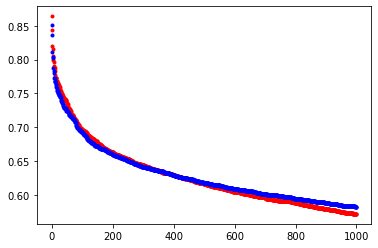

In [658]:
import scipy.stats
import numpy as np
zipf = scipy.stats.zipf.cdf(values[0:1000],1.190)
zipf_ref = scipy.stats.zipf.cdf(values_test[0:1000],1.181)
plt.plot(zipf[:1000],'r.')
plt.plot(zipf_ref[:1000],'b.')

In [655]:
scipy.stats.kstest(zipf, zipf_ref)

KstestResult(statistic=0.138, pvalue=1.0187003665032852e-08)

In [377]:
ks = []
for i in range(1,1000):
    val = scipy.stats.ks_2samp(zipf[:1000],zipf_ref[:1000])
    ks.append(val)

In [371]:
ks = []
for i in range(1,1000):    
    val = scipy.stats.ks_2samp(values[:i],values_test[:i])
    ks.append(val)

In [302]:
scipy.stats.ks_2samp(zipf,zipf_ref)

KstestResult(statistic=0.089, pvalue=0.0007213629171338913)

In [1]:
plt.plot(ks)

NameError: name 'plt' is not defined

In [ ]:
def sigma(s):
    for i in len(values):
        sig = 1/i**s
#N - length of corpus
def likelihood(s, N):
    l1 = -N*log(sigma(s))
    for i in N:
        l1= 

In [496]:
import math
dist_func(values)

NameError: name 'dist_func' is not defined

In [335]:
len(frequency_gen)

24220

In [400]:
freq_test_vals = list(frequency_test.values())
freq_test_vals.sort(reverse=False)#True)

freq_gen_vals = list(frequency_gen.values())
freq_gen_vals.sort(reverse=False)#True)

real_freq_test_vals = []
real_freq_gen_vals = []

for i in freq_test_vals:
    real_freq_test_vals.append(1/i)
    
for i in freq_gen_vals:
    real_freq_gen_vals.append(1/i)
    
#real_freq_test_vals
real_freq_gen_vals[-1000:]

[0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.0196078431372549,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.019230769230769232,
 0.0192307692

In [376]:
#zipf law pure
zipf = []

for i in range(1,len(frequency_gen)):
    x = 20932/i
    zipf.append(x)
    
real_zipf = []
zipf.sort(reverse=False)
for i in zipf:
    real_zipf.append(1/i)

#plt.plot(real_zipf[-1000:])
#plt.plot(real_freq_gen_vals[-1000:])
zipf

[0.8642801106569222,
 0.8643157981666529,
 0.8643514886236942,
 0.8643871820284109,
 0.8644228783811687,
 0.8644585776823326,
 0.8644942799322678,
 0.8645299851313398,
 0.8645656932799141,
 0.8646014043783561,
 0.8646371184270313,
 0.8646728354263054,
 0.864708555376544,
 0.8647442782781128,
 0.8647800041313778,
 0.8648157329367047,
 0.8648514646944594,
 0.8648871994050078,
 0.8649229370687161,
 0.8649586776859504,
 0.8649944212570767,
 0.8650301677824613,
 0.8650659172624705,
 0.8651016696974707,
 0.8651374250878281,
 0.8651731834339093,
 0.8652089447360807,
 0.865244708994709,
 0.8652804762101608,
 0.8653162463828028,
 0.8653520195130018,
 0.8653877956011246,
 0.8654235746475379,
 0.865459356652609,
 0.8654951416167046,
 0.8655309295401918,
 0.865566720423438,
 0.86560251426681,
 0.8656383110706753,
 0.8656741108354011,
 0.8657099135613548,
 0.865745719248904,
 0.8657815278984159,
 0.8658173395102581,
 0.8658531540847983,
 0.8658889716224042,
 0.8659247921234435,
 0.865960615588284,


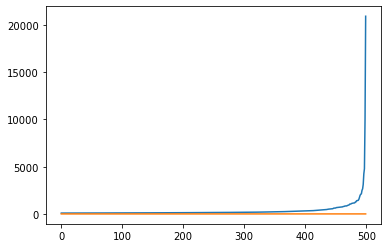

In [375]:
plt.plot(freq_gen_vals[-500:])
plt.plot(zipf[-500:])


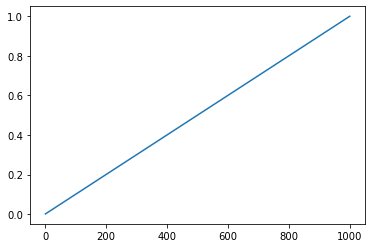

In [374]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_gen = ECDF(real_freq_gen_vals[len(real_freq_gen_vals)-1000:])

ecdf_test = ECDF(real_freq_test_vals[len(real_freq_test_vals)-1000:])

ecdf_zipf = ECDF(real_zipf[len(real_zipf)-1000:])

#plt.plot(ecdf_gen.x, ecdf_gen.y)
plt.plot(ecdf_zipf.x, ecdf_zipf.y)

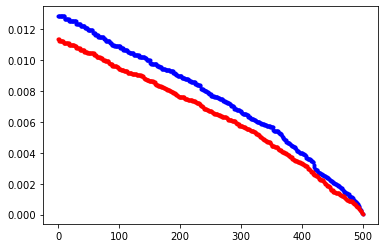

In [291]:
plt.plot(real_freq_test_vals[len(real_freq_test_vals)-500:], 'b.')
plt.plot(real_freq_gen_vals[len(real_freq_gen_vals)-500:], 'r.')

In [158]:
import scipy

In [272]:
ks = []
for i in range(1,1000):
    val = scipy.stats.ks_2samp(real_freq_test_vals[int(len(real_freq_test_vals)-i): ],real_freq_gen_vals[int(len(real_freq_gen_vals)-i): ])
    ks.append(val)

In [273]:
ks

[KstestResult(statistic=1.0, pvalue=1.0),
 KstestResult(statistic=0.5, pvalue=1.0),
 KstestResult(statistic=0.3333333333333333, pvalue=1.0),
 KstestResult(statistic=0.5, pvalue=0.7714285714285716),
 KstestResult(statistic=0.4, pvalue=0.873015873015873),
 KstestResult(statistic=0.3333333333333333, pvalue=0.9307359307359307),
 KstestResult(statistic=0.2857142857142857, pvalue=0.9627039627039629),
 KstestResult(statistic=0.375, pvalue=0.6601398601398599),
 KstestResult(statistic=0.4444444444444444, pvalue=0.35170711641299873),
 KstestResult(statistic=0.5, pvalue=0.16782134274394334),
 KstestResult(statistic=0.45454545454545453, pvalue=0.21147608841107293),
 KstestResult(statistic=0.4166666666666667, pvalue=0.2557751845677543),
 KstestResult(statistic=0.38461538461538464, pvalue=0.2999201969117166),
 KstestResult(statistic=0.42857142857142855, pvalue=0.15493471530488623),
 KstestResult(statistic=0.4666666666666667, pvalue=0.07546400948132746),
 KstestResult(statistic=0.4375, pvalue=0.09332

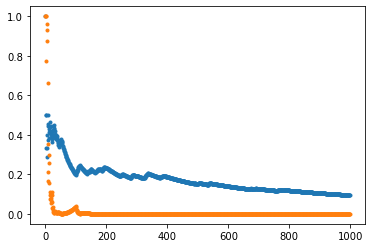

In [279]:
plt.plot(ks, '.')

In [257]:
ks_stat = scipy.stats.ks_2samp(real_freq_test_vals[len(real_freq_test_vals)-2000:],real_freq_gen_vals[len(real_freq_gen_vals)-2000:])
ks_stat

KstestResult(statistic=0.0565, pvalue=0.003368945209908168)

In [378]:
ks_stat1 = scipy.stats.ks_2samp(ecdf_zipf.x, ecdf_gen.x)
ks_stat1

KstestResult(statistic=0.999000999000999, pvalue=0.0)

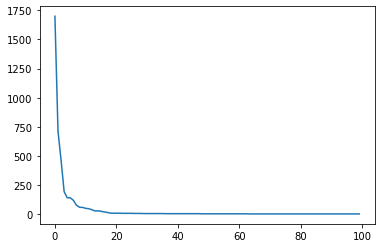

In [418]:
b = np.random.zipf(1.5,1000)

plt.plot(sorted(b[:100], reverse=True))